# **Dataset Details - IMDB Dataset of 50K Movie Reviews**
IMDB dataset having 50K movie reviews for natural language processing or Text analytics.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. A set of 25,000 highly polar movie reviews for training and 25,000 for testing is provided. 

**Goal -** To predict the number of positive and negative reviews using either classification or deep learning algorithms.

**Link to Dataset :** https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

# **Data Preparation**

**Load In and Visualize Data**

In [16]:
from google.colab import drive 
drive.mount('/content/drive') # mount your drive using drive.mount()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# access file from your Google Drive directly
with open('/content/drive/My Drive/Advanced Machine Learning Project/IMDB Dataset.csv', 'r') as f: 
  df = pd.read_csv(f)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


**Convert Data to Lower Case**

In [18]:
df['review'] = df['review'].apply(lambda x:x.lower()) # lambda functions help to perform small tasks with less code
df['review'][0]

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.<br /><br />the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.<br /><br />it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />i would say the main appeal of the show is due to the fa

**Remove Punctuation from Data**

In [19]:
from string import punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [20]:
df['clean_text'] = df['review'].apply(lambda x:''.join([c for c in x if c not in punctuation]))
df['clean_text'][0]

'one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with mebr br the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordbr br it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awaybr br i would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare fo

In [21]:
df['len_review'] = df['clean_text'].apply(lambda x:len(x))
df.head()

,review,sentiment,clean_text,len_review
0,one of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,1683
1,a wonderful little production. <br /><br />the...,positive,a wonderful little production br br the filmin...,954
2,i thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,886
3,basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...,706
4,"petter mattei's ""love in the time of money"" is...",positive,petter matteis love in the time of money is a ...,1261


**Tokenize and Create a list of reviews**

In [22]:
all_text2 = df['clean_text'].tolist()

Create Vocab to Int mapping dictionary

In [23]:
from collections import Counter
all_text2 = ' '.join(all_text2)

# create a list of words
words = all_text2.split()

# Count all the words using Counter Method
count_words = Counter(words)

total_words = len(words)
sorted_words = count_words.most_common(total_words)

vocab_to_int = {w:i for i, (w,c) in enumerate(sorted_words)}
vocab_to_int = {w:i+1 for i, (w,c) in enumerate(sorted_words)}
reviews_split = df['clean_text'].tolist()

Encode the Words

In [24]:
reviews_int = []
for review in reviews_split:
    r = [vocab_to_int[w] for w in review.split()]
    reviews_int.append(r)
print (reviews_int[0:3])

df.head()

[[28, 4, 1, 77, 1941, 44, 1063, 11, 100, 145, 40, 479, 3324, 393, 461, 26, 3190, 34, 23, 205, 14, 10, 6, 601, 48, 590, 15, 2137, 12, 1, 87, 146, 11, 3255, 69, 42, 3324, 13, 29, 5600, 2, 15378, 134, 4, 582, 61, 282, 7, 205, 35, 1, 670, 138, 1707, 69, 10, 6, 21, 3, 118, 16, 1, 8330, 5794, 39, 11861, 10, 118, 2508, 55, 6064, 15, 5636, 5, 1470, 381, 39, 582, 29, 6, 3407, 7, 1, 352, 340, 4, 1, 23503, 12, 8, 6, 469, 3324, 14, 11, 6, 1, 11516, 338, 5, 1, 16023, 6870, 2543, 1061, 61649, 8, 2637, 1375, 20, 25365, 536, 33, 4727, 2520, 4, 1, 1208, 112, 31, 1, 7153, 25, 2992, 13015, 2, 408, 61650, 37, 17529, 6, 21, 319, 20, 1, 5098, 3720, 536, 6, 344, 5, 81744, 8470, 41120, 15379, 5171, 7893, 2461, 2, 18404, 61651, 329, 9265, 7472, 13445, 2, 8721, 34936, 23, 109, 224, 5436, 12, 9, 57, 128, 1, 269, 1303, 4, 1, 118, 6, 668, 5, 1, 187, 11, 8, 262, 112, 77, 257, 548, 3001, 819, 178, 1271, 4349, 16, 2499, 1096, 819, 1412, 819, 81745, 148, 978, 181, 1, 87, 393, 9, 120, 201, 3255, 69, 14, 37, 1574, 8, 13

,review,sentiment,clean_text,len_review
0,one of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,1683
1,a wonderful little production. <br /><br />the...,positive,a wonderful little production br br the filmin...,954
2,i thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,886
3,basically there's a family where a little boy ...,negative,basically theres a family where a little boy j...,706
4,"petter mattei's ""love in the time of money"" is...",positive,petter matteis love in the time of money is a ...,1261


Encode the Labels

In [25]:
labels_split = df['sentiment'].tolist()
encoded_labels = [1 if label =='positive' else 0 for label in labels_split]
encoded_labels = np.array(encoded_labels)

**Analyze Length of Reviews**

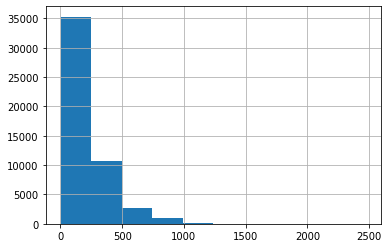

count    50000.000000
mean       230.258240
std        170.663887
min          4.000000
25%        126.000000
50%        172.000000
75%        280.000000
max       2469.000000
dtype: float64

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
reviews_len = [len(x) for x in reviews_int]
pd.Series(reviews_len).hist()
plt.show()
pd.Series(reviews_len).describe()

**Removing Outliers — Getting rid of extremely long or short reviews**

In [27]:
reviews_int = [ reviews_int[i] for i, l in enumerate(reviews_len) if l > 0 ]
encoded_labels = [ encoded_labels[i] for i, l in enumerate(reviews_len) if l > 0 ]

**Padding / Truncating the remaining data**

In [28]:
def pad_features(reviews_int, seq_length):
  
    ''' Return features of review_ints, where each review is padded with 0's or truncated to the input seq_length.
    '''
    features = np.zeros((len(reviews_int), seq_length), dtype = int)
    
    for i, review in enumerate(reviews_int):
        review_len = len(review)
        
        if review_len <= seq_length:
            zeroes = list(np.zeros(seq_length-review_len))
            new = zeroes+review
        elif review_len > seq_length:
            new = review[0:seq_length]
        
        features[i,:] = np.array(new)
    
    return features

In [29]:
features = pad_features(reviews_int,200)
print (features[:10,:])

len_feat = len(features)
split_frac = 0.8
print(len_feat)

[[   28     4     1 ...   978   181     1]
 [    0     0     0 ...  1900    73   223]
 [    0     0     0 ...    64    15   333]
 ...
 [    0     0     0 ...    20     1   946]
 [    0     0     0 ... 10151 45601    60]
 [    0     0     0 ...    12    79  1215]]
50000


**Dataset Split - Training, Validation, Test**

In [112]:
split_frac = 0.8
train_x = features[0:int(split_frac*len_feat)]
train_y = encoded_labels[0:int(split_frac*len_feat)]
remaining_x = features[int(split_frac*len_feat):]
remaining_y = encoded_labels[int(split_frac*len_feat):]
valid_x = remaining_x[0:int(len(remaining_x)*0.5)]
valid_y = remaining_y[0:int(len(remaining_y)*0.5)]
test_x = remaining_x[int(len(remaining_x)*0.5):]
test_y = remaining_y[int(len(remaining_y)*0.5):]

type(test_y)
train_y = np.array(train_y)
test_y = np.array(test_y)
valid_y = np.array(valid_y)


**Dataloaders and Batching**

In [124]:
import torch
from torch.utils.data import DataLoader, TensorDataset
# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
valid_data = TensorDataset(torch.from_numpy(valid_x), torch.from_numpy(valid_y))
test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))
# dataloaders
batch_size = 50
# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size)

In [125]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()
print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print()
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([50, 200])
Sample input: 
 tensor([[     0,      0,      0,  ...,   1820,     10,     28],
        [     0,      0,      0,  ...,     44,    120,    105],
        [  1029, 115174,      2,  ...,      2,   3152,     41],
        ...,
        [    39,     30,    217,  ...,     91,     11,     94],
        [     0,      0,      0,  ...,     17,    275,  40715],
        [     0,      0,      0,  ...,     25,    120,    105]])

Sample label size:  torch.Size([50])
Sample label: 
 tensor([0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
        1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
        1, 1])


# **Model Definition**

**Define the LSTM Network Architecture**

In [126]:
import torch.nn as nn

class SentimentLSTM(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super().__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, 
                            dropout=drop_prob, batch_first=True)
        
        # dropout layer
        self.dropout = nn.Dropout(0.3)
        
        # linear and sigmoid layers
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sig = nn.Sigmoid()
        

    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)

        # embeddings and lstm_out
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
    
        # stack up lstm outputs
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        # dropout and fully-connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        # sigmoid function
        sig_out = self.sig(out)
        
        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1] # get last batch of labels
        
        # return last sigmoid output and hidden state
        return sig_out, hidden
    
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden

# **Model Training**

**Instantiate the network**

In [127]:
# Instantiate the model w/ hyperparams
vocab_size = len(vocab_to_int)+1 # +1 for the 0 padding
output_size = 1
embedding_dim = 400
hidden_dim = 256
n_layers = 2
net = SentimentLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)

print(net)

SentimentLSTM(
  (embedding): Embedding(181686, 400)
  (lstm): LSTM(400, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [128]:
# First checking if GPU is available
train_on_gpu=torch.cuda.is_available()

if(train_on_gpu):
    print('Training on GPU.')
else:
    print('No GPU available, training on CPU.')

Training on GPU.


**Training Loop**

In [129]:
# loss and optimization functions
lr=0.001

criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

In [130]:
# training params
epochs = 4 # 3-4 is approx where I noticed the validation loss stop decreasing

counter = 0
print_every = 100
clip=5 # gradient clipping

# move model to GPU, if available
if(train_on_gpu):
    net.cuda()

In [131]:
net.train()
# train for some number of epochs
for e in range(epochs):
    # initialize hidden state
    h = net.init_hidden(batch_size)

    # batch loop
    for inputs, labels in train_loader:
        counter += 1
        #print(counter)

        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()

        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        net.zero_grad()

        # get the output from the model
        output, h = net(inputs, h)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            for inputs, labels in valid_loader:

                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = tuple([each.data for each in val_h])

                if(train_on_gpu):
                    inputs, labels = inputs.cuda(), labels.cuda()

                output, val_h = net(inputs, val_h)
                val_loss = criterion(output.squeeze(), labels.float())

                val_losses.append(val_loss.item())

            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))

Epoch: 1/4... Step: 100... Loss: 0.620039... Val Loss: 0.697463
Epoch: 1/4... Step: 200... Loss: 0.722154... Val Loss: 0.612525
Epoch: 1/4... Step: 300... Loss: 0.692321... Val Loss: 0.693094
Epoch: 1/4... Step: 400... Loss: 0.612899... Val Loss: 0.656565
Epoch: 1/4... Step: 500... Loss: 0.481736... Val Loss: 0.558929
Epoch: 1/4... Step: 600... Loss: 0.476891... Val Loss: 0.658610
Epoch: 1/4... Step: 700... Loss: 0.495688... Val Loss: 0.491266
Epoch: 1/4... Step: 800... Loss: 0.428548... Val Loss: 0.459063
Epoch: 2/4... Step: 900... Loss: 0.428912... Val Loss: 0.426378
Epoch: 2/4... Step: 1000... Loss: 0.344904... Val Loss: 0.408977
Epoch: 2/4... Step: 1100... Loss: 0.313144... Val Loss: 0.422823
Epoch: 2/4... Step: 1200... Loss: 0.371934... Val Loss: 0.390398
Epoch: 2/4... Step: 1300... Loss: 0.305166... Val Loss: 0.374824
Epoch: 2/4... Step: 1400... Loss: 0.246883... Val Loss: 0.353225
Epoch: 2/4... Step: 1500... Loss: 0.239708... Val Loss: 0.365080
Epoch: 2/4... Step: 1600... Loss: 

# **Model Evaluation after Training (Testing)**

**On User Generated Data**

In [135]:
def preprocess(review, vocab_to_int):
    review = review.lower()
    word_list = review.split()
    num_list = []
    #list of reviews
    #though it contains only one review as of now
    reviews_int = []
    for word in word_list:
        if word in vocab_to_int.keys():
            num_list.append(vocab_to_int[word])
    reviews_int.append(num_list)
    return reviews_int

def predict(net, test_review, sequence_length=200):
    ''' Prints out whether a give review is predicted to be 
        positive or negative in sentiment, using a trained model.
        
        params:
        net - A trained net 
        test_review - a review made of normal text and punctuation
        sequence_length - the padded length of a review
        '''
    #change the reviews to sequence of integers
    int_rev = preprocess(test_review, vocab_to_int)
    #pad the reviews as per the sequence length of the feature
    features = pad_features(int_rev, seq_length=seq_length)
    
    #changing the features to PyTorch tensor
    features = torch.from_numpy(features)
    
    #pass the features to the model to get prediction
    net.eval()
    val_h = net.init_hidden(1)
    val_h = tuple([each.data for each in val_h])

    if(train_on_gpu):
        features = features.cuda()

    output, val_h = net(features, val_h)
    
    #rounding the output to nearest 0 or 1
    pred = torch.round(output)
    
    #mapping the numeric values to postive or negative
    output = ["Positive" if pred.item() == 1 else "Negative"]
    
    # print custom response based on whether test_review is pos/neg
    print(output)

In [136]:
test_review_pos = 'This movie had the best acting and the dialogue was so good. I loved it.'
seq_length=200
predict(net, test_review_pos, seq_length)

['Positive']


In [138]:
test_review_neg = 'The worst movie I have seen; acting was terrible and I want my money back. This movie had bad acting and the dialogue was slow.'
seq_length=200
predict(net, test_review_neg, seq_length)

['Negative']


**On Test Data**

In [132]:
# Get test data loss and accuracy

test_losses = [] # track loss
num_correct = 0

# init hidden state
h = net.init_hidden(batch_size)

net.eval()
actual = []
predicted = []
# iterate over test data
for inputs, labels in test_loader:
    
    # Creating new variables for the hidden state, otherwise
    # we'd backprop through the entire training history
    h = tuple([each.data for each in h])

    if(train_on_gpu):
        inputs, labels = inputs.cuda(), labels.cuda()
        actual = np.append(actual, labels.cpu().detach().numpy())
    
    # get predicted outputs
    output, h = net(inputs, h)
    
    # calculate loss
    test_loss = criterion(output.squeeze(), labels.float())
    test_losses.append(test_loss.item())
    
    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze())  # rounds to the nearest integer
    predicted = np.append(predicted, pred.cpu().detach().numpy())
    
    # compare predictions to true label
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)




# **Model Qualitative Analysis**

In [133]:
# -- stats! -- ##
# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data
test_acc = num_correct/len(test_loader.dataset)
print("Test accuracy: {:.3f}".format(test_acc))

Test loss: 0.415
Test accuracy: 0.855


In [134]:
# confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

matrix = confusion_matrix(actual, predicted, labels=[1,0])
print('Confusion matrix : \n',matrix)

# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual, predicted,labels=[1,0]).reshape(-1)
print('Outcome values : \n', tp, fn, fp, tn)

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n',matrix)


Confusion matrix : 
 [[2193  277]
 [ 449 2081]]
Outcome values : 
 2193 277 449 2081
Classification report : 
               precision    recall  f1-score   support

           1       0.83      0.89      0.86      2470
           0       0.88      0.82      0.85      2530

    accuracy                           0.85      5000
   macro avg       0.86      0.86      0.85      5000
weighted avg       0.86      0.85      0.85      5000



# **Observations and Comments**

From the **Confusion Matrix**, we get to know that:

Positive Reviews correctly predicted as Positive by our model : True Positive - 2193 out of 5000

Negative Reviews incorrectly predicted as Positive by our model : False Positive - 449 out of 5000

Negative Reviews correctly predicted as Negative by our model : True Negative - 2081 out of 5000

Positive Reviews incorrectly predicted as Negative by our model : False Neagtive - 277 out of 5000

**Precision for Positive Reviews - 83%**
*(how many of the correctly predicted cases actually turned out to be positive)*

**Precision for Negative Reviews - 88%**
*(how many of the correctly predicted cases actually turned out to be negative)*

**Recall for Positive Reviews - 89%**
*(Recall tells us how many of the actual positive cases we were able to predict correctly with our model)*

**Recall for Neagtive Reviews - 82%**
*(Recall tells us how many of the actual negative cases we were able to predict correctly with our model)*

**The overall accuracy of our model is 85% which is a pretty good one for classification.**